In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image

In [4]:
# Import phantom image
phantom = Image.open('phantom.png').convert('L')
phantom = np.array(phantom)

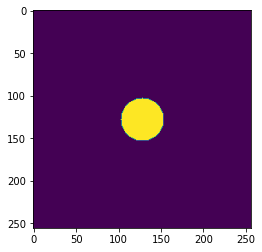

In [5]:
plt.imshow(phantom)

# Motion artifact - case 1

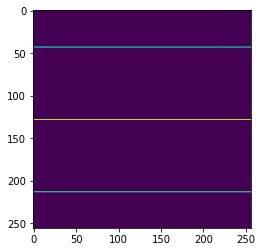

In [40]:
# Build motion artifact position map
# (*) nx is the phase encoding direction
nx, ny = phantom.shape

mo_map = np.zeros([nx, ny])

# Set positive value where motion artifacts should appear
mo_map[43:nx:nx//3, :] = 1.0

plt.imshow(mo_map)

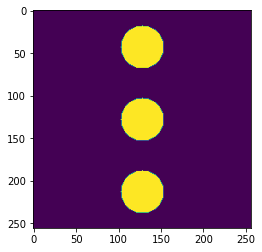

In [41]:
# Generate motion artifact
mo_map_ksp = np.fft.fftshift(np.fft.fftn(np.fft.ifftshift(mo_map, axes=[0]),
                                         axes=[0],
                                         norm='ortho'),
                             axes=[0])

phantom_ksp = np.fft.fftshift(np.fft.fftn(np.fft.ifftshift(phantom, axes=[0]),
                                          axes=[0],
                                          norm='ortho'),
                              axes=[0])

kspace_with_artifact = phantom_ksp * mo_map_ksp

img_with_artifact = np.fft.fftshift(np.fft.ifftn(np.fft.fftshift(kspace_with_artifact,
                                                                 axes=[0]),
                                                 axes=[0],
                                                 norm='ortho'),
                                    axes=[0])

plt.imshow(np.abs(img_with_artifact))

# Motion artifact - case 2

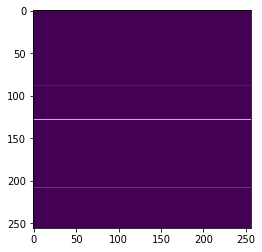

In [44]:
# Build motion artifact position map
# (*) nx is the phase encoding direction
nx, ny = phantom.shape

mo_map = np.zeros([nx, ny])

# Set positive value where motion artifacts should appear
mo_map[nx//2, :] = 1.0
mo_map[nx//2 + 80, :] = 0.25
mo_map[nx//2 - 40, :] = 0.1

plt.imshow(mo_map)

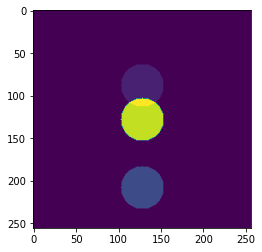

In [45]:
# Generate motion artifact
mo_map_ksp = np.fft.fftshift(np.fft.fftn(np.fft.ifftshift(mo_map, axes=[0]),
                                         axes=[0],
                                         norm='ortho'),
                             axes=[0])

phantom_ksp = np.fft.fftshift(np.fft.fftn(np.fft.ifftshift(phantom, axes=[0]),
                                          axes=[0],
                                          norm='ortho'),
                              axes=[0])

kspace_with_artifact = phantom_ksp * mo_map_ksp

img_with_artifact = np.fft.fftshift(np.fft.ifftn(np.fft.fftshift(kspace_with_artifact,
                                                                 axes=[0]),
                                                 axes=[0],
                                                 norm='ortho'),
                                    axes=[0])

plt.imshow(np.abs(img_with_artifact))